## Skorch regression network examples

In [1]:
import subprocess

# Installation on Google Colab
!git clone https://github.com/jlm429/pyperch
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/pyperch')

try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch' , 'torch'])
except ImportError:
    pass

In [3]:
import numpy as np
from sklearn.datasets import make_regression
from torch import nn, optim
#from skorch import NeuralNetClassifier
from skorch import NeuralNetRegressor
from pyperch.neural.backprop_nn import BackpropModule 
import matplotlib.pyplot as plt

In [ ]:
X, y = make_regression(n_samples=1000, n_features=12, n_informative=10, noise=.2)
X = X.astype(np.float32)
y = y.reshape(-1, 1).astype(np.float32)  # Reshape y to be a 2D array for compatibility with nn

##### MLPClassifier vs. MLPRegressor 

[Chapter 6](https://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html) gives a Bayesian justification for using log loss when searching for a maximum likelihood hypothesis to predict probabilities and likewise, squared error for regression.  These loss functions are automatically selected when you use scikit learn's MLPClassifier or MLPRegressor. With PyTorch, we can select these manually.  Additionally, raw outputs are needed for regression so we'll use a linear activation instead of softmax for the output layer. 

In [14]:
from skorch.callbacks import EpochScoring 

net = NeuralNetRegressor(
    module=BackpropModule,
    module__input_dim=12,
    module__output_dim=1,
    module__hidden_units=64,
    module__hidden_layers=1,
    #module__dropout_percent=0.1,
    module__activation=nn.LeakyReLU(),
    module__output_activation=lambda x: x,
    max_epochs=100,
    verbose=1,
    callbacks=[EpochScoring(scoring='neg_mean_squared_error', name='train_acc', on_train=True),],
    lr=.0001,
    iterator_train__shuffle=True,
)

In [16]:
# fit data
net.fit(X, y)

  epoch    train_acc    train_loss    valid_loss     dur
-------  -----------  ------------  ------------  ------
      1  -27877.1816    27877.1824    24267.7816  0.0287
      2  -27868.5605    27868.5603    24259.7666  0.0224
      3  -27857.5703    27857.5698    24250.1880  0.0215
      4  -27844.5371    27844.5366    24237.2005  0.0201
      5  -27826.1719    27826.1750    24218.8807  0.0197
      6  -27800.4121    27800.4117    24191.6148  0.0205
      7  -27761.5254    27761.5260    24152.4822  0.0206
      8  -27705.4082    27705.4084    24091.0166  0.0241
      9  -27616.1484    27616.1484    23988.9727  0.0242
     10  -27466.8457    27466.8452    23822.5099  0.0258
     11  -27217.1758    27217.1746    23503.6324  0.0251
     12  -26723.9941    26723.9927    22824.9496  0.0235
     13  -25637.7617    25637.7635    21231.6631  0.0254
     14  -22978.0293    22978.0298    17310.0840  0.0243
     15  -16554.5020    16554.5039     8496.7414  0.0223
     16   -5814.1377     5814.1

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=BackpropModule(
    (dropout): Dropout(p=0, inplace=False)
    (activation): LeakyReLU(negative_slope=0.01)
    (layers): ModuleList(
      (0): Linear(in_features=12, out_features=64, bias=True)
      (1): Linear(in_features=64, out_features=64, bias=True)
      (2): Linear(in_features=64, out_features=1, bias=True)
    )
  ),
)

## Plot learning curves

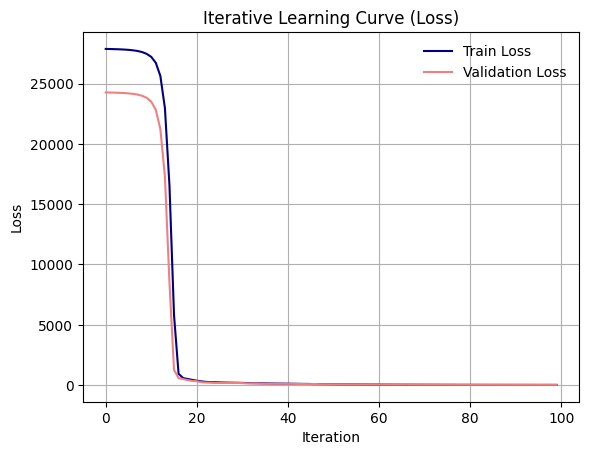

In [17]:
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)